**VISUALIZATION**

In [266]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [267]:
df=pd.read_csv("/content/countries of the world.csv",decimal=',')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


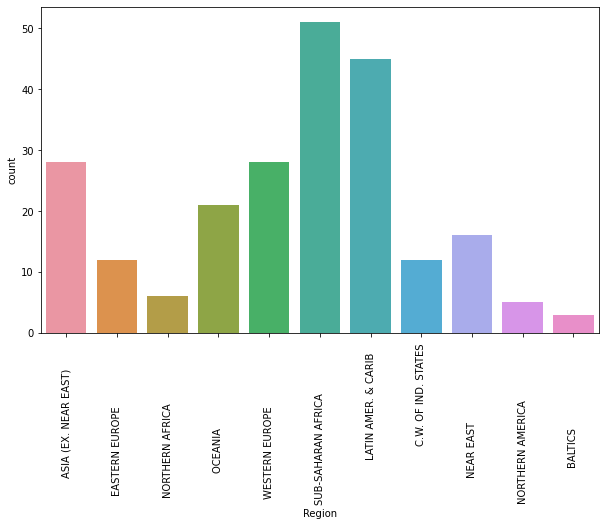

In [268]:
plt.figure(figsize=(10,6)) 
sns.countplot(df['Region']) 
plt.xticks(rotation=90)
plt.show()

In [269]:
"""Literacy is defined as being able to read and write, or to having knowledge about a specific subject"""
literacy = ['0-20%' if x<=20.0 else '20-40%' if x>20.0 and x<=40.0 else '40-60%' if x>40.0 and x<=60.0 else '60-80%'
if x>60.0 and x<=80.0 else '80-100%' for x in df['Literacy (%)']]
phone = ['0-200' if x<=200.0 else '200-400' if x<=400.0 and x>200.0 else '400-600' if x>400.0 and x<=600.0
else '600-800' if x>600.0 and x<=800.0 else '800-1000' for x in df['Phones (per 1000)']]
"""Arable farming is growing crops in fields, which have usually been ploughed before planting"""
arable = ['0-20%' if x<=20.0 else '20-40%' if x>20.0 and x<=40.0 else '40-60%' if x>40.0 and x<=60.0 else '60-80%'
if x>60.0 and x<=80.0 else '80-100%' for x in df['Arable (%)']]
crops = ['0-20%' if x<=20.0 else '20-40%' if x>20.0 and x<=40.0 else '40-60%' if x>40.0 and x<=60.0 else '60-80%'
if x>60.0 and x<=80.0 else '80-100%' for x in df['Crops (%)']]
others =['0-20%' if x<=20.0 else '20-40%' if x>20.0 and x<=40.0 else '40-60%' if x>40.0 and x<=60.0 else '60-80%'
if x>60.0 and x<=80.0 else '80-100%' for x in df['Other (%)']]
gdp =['0-10000$' if x<=10000.0 else '10000-20000$' if x>10000.0 and x<=20000.0
else '20000-30000$' if x>20000.0 and x<=30000.0 else '30000-40000$' if x>30000.0 and x<=40000.0
else '40000-50000$' if x>40000.0 and x<=50000.0 else 'more than 50000$' for x in df['GDP ($ per capita)']]
population = ['Below 1 million' if x<=1000000 else '1-20 million' if x>1000000 and x<=20000000 else '20-60 million'
if x>20000000 and x<=60000000 else '60-100 million' if x>60000000 and x<=100000000 else '100-500 million'
if x>100000000 and x<=500000000 else 'above 500 million' for x in df['Population']]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


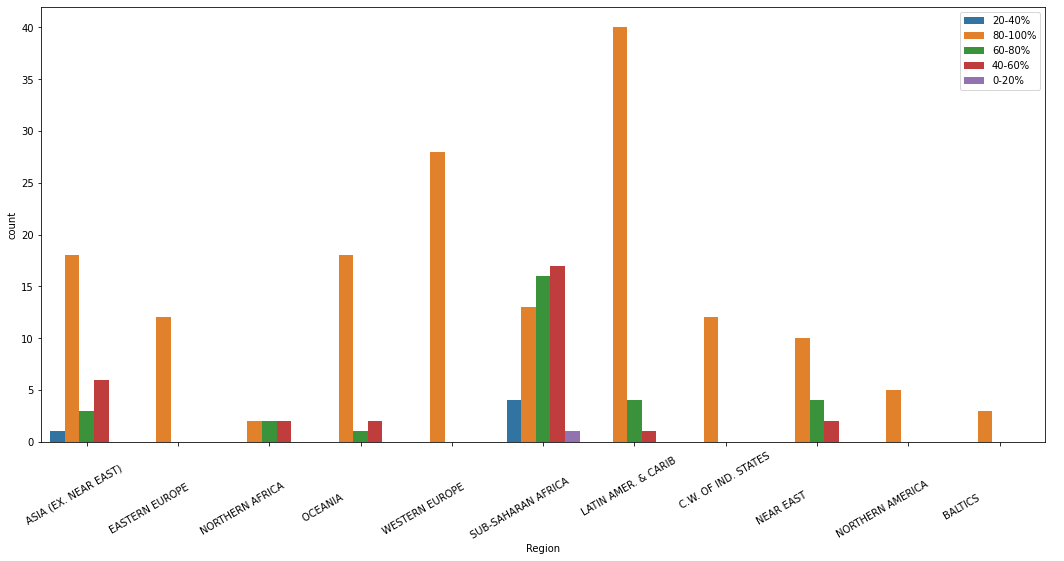

In [270]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=literacy)
plt.xticks(rotation=30)
plt.legend (loc='upper right')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


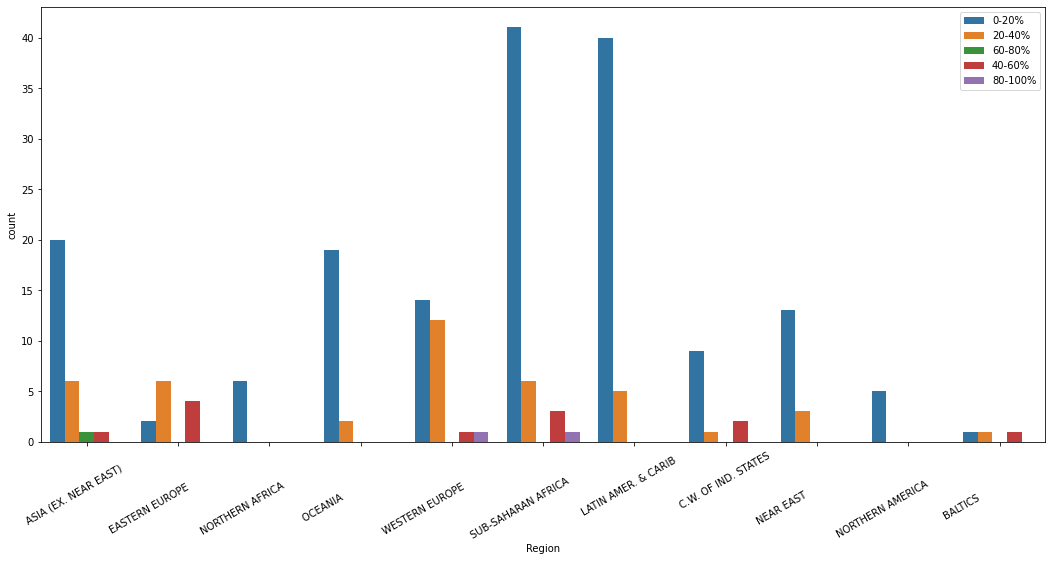

In [271]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=arable)
plt.xticks(rotation=30)
plt.legend (loc='upper right')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


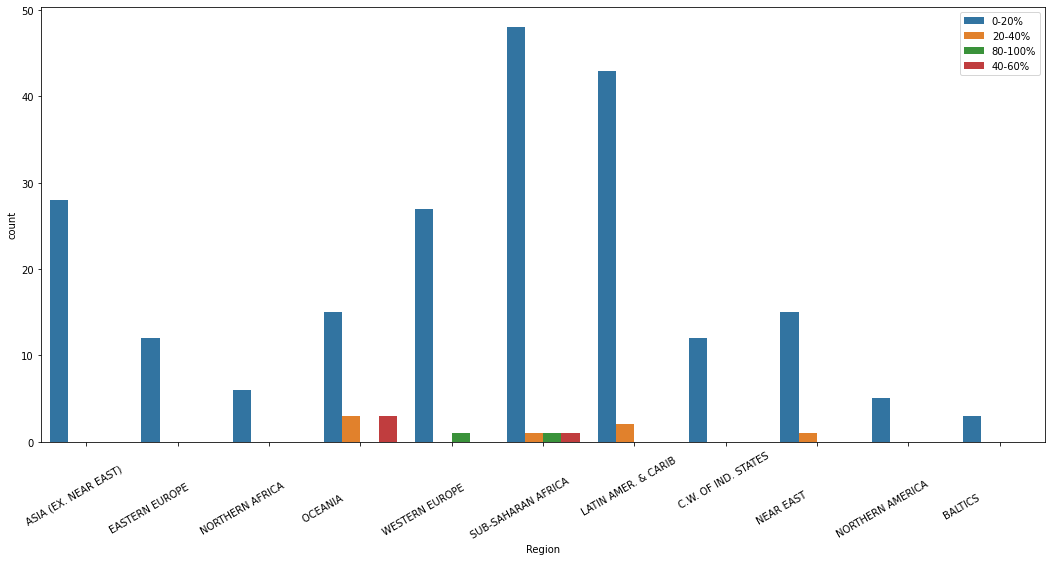

In [272]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=crops)
plt.xticks(rotation=30)
plt.legend (loc='upper right')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


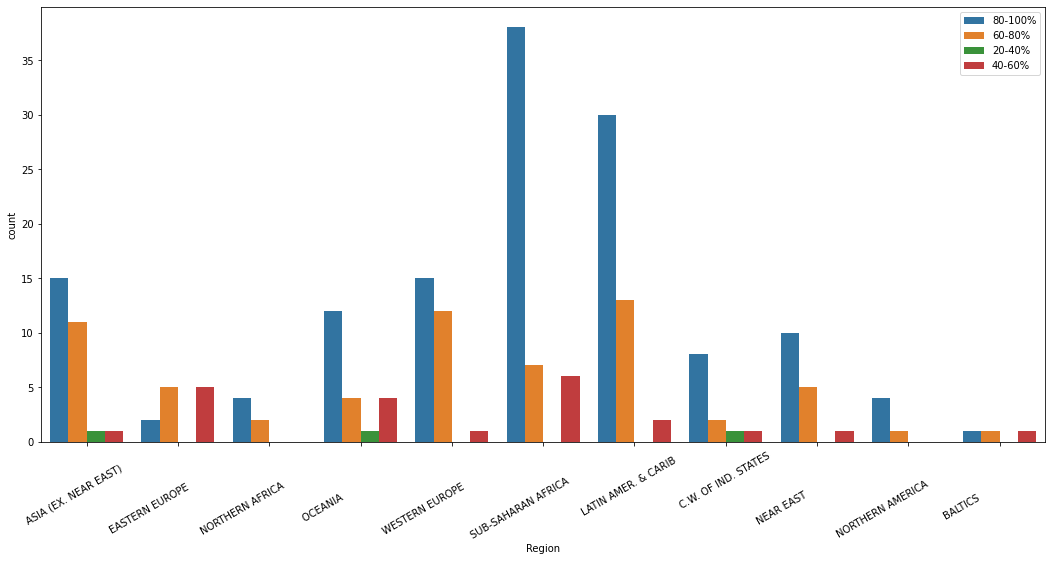

In [273]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=others)
plt.xticks(rotation=30)
plt.legend (loc='upper right')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


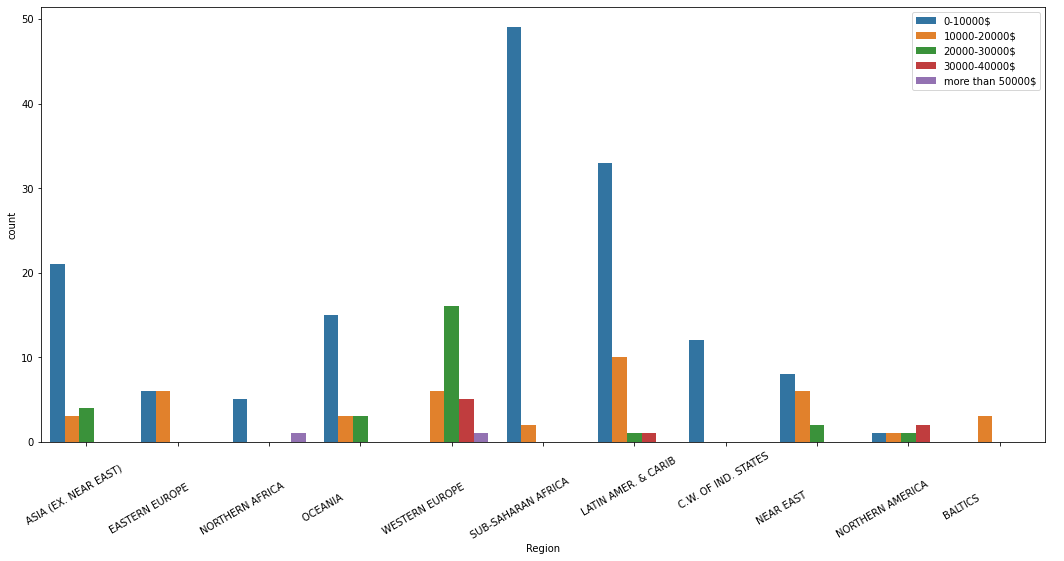

In [274]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=gdp)
plt.xticks(rotation=30)
plt.legend (loc='upper right')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


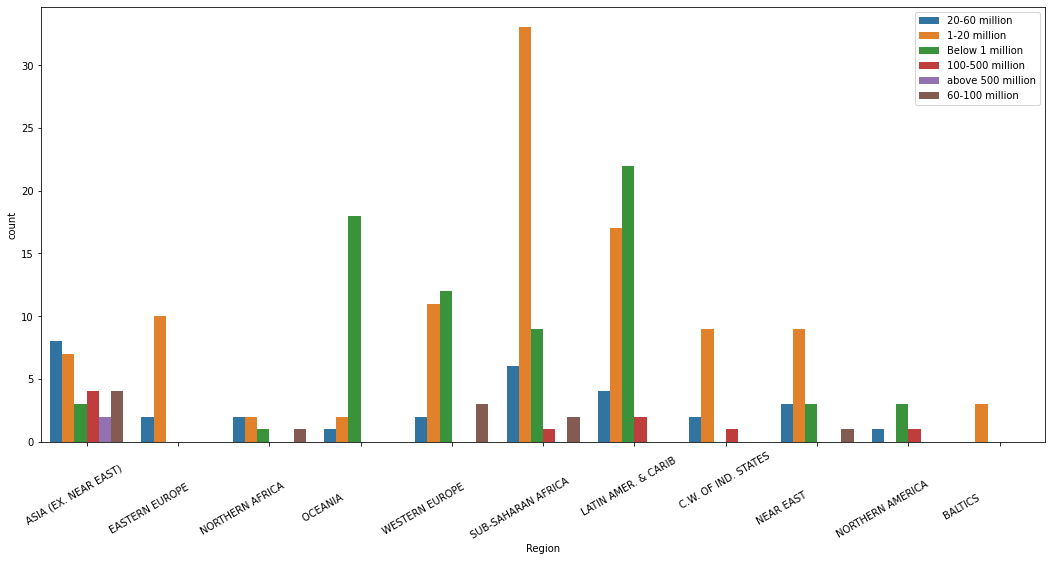

In [275]:
plt.figure(figsize=(18,8))
sns.countplot(df['Region'],hue=population)
plt.xticks(rotation=30)
plt.legend (loc='upper right')
plt.show()

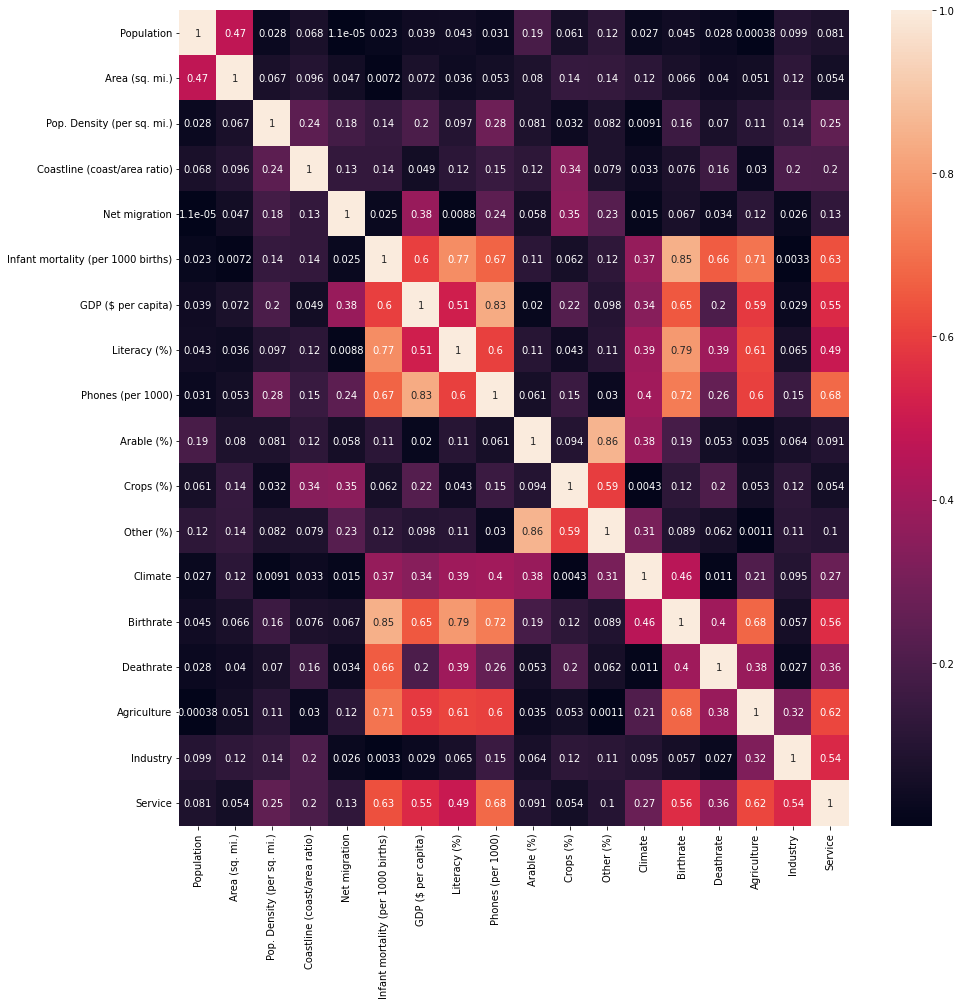

In [276]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr().abs(),annot=True)

In [277]:
df.describe(include='all')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


**Preprocessing**

In [278]:
df.drop(['Other (%)','Infant mortality (per 1000 births)','Country'],axis=1,inplace=True)

In [279]:
df.isnull().sum()

Region                           0
Population                       0
Area (sq. mi.)                   0
Pop. Density (per sq. mi.)       0
Coastline (coast/area ratio)     0
Net migration                    3
GDP ($ per capita)               1
Literacy (%)                    18
Phones (per 1000)                4
Arable (%)                       2
Crops (%)                        2
Climate                         22
Birthrate                        3
Deathrate                        4
Agriculture                     15
Industry                        16
Service                         15
dtype: int64

In [280]:
df['Climate']=df['Climate'].fillna(df['Climate'].mode().max())

nullFeatures=list(df.columns)

for i,j in enumerate(nullFeatures): 
  if df[j].isnull().sum()!=0: 
    df[j]=df[j].fillna(df[j].mean())

In [281]:
np.where(df['Phones (per 1000)']>1000)


(array([138]),)

In [282]:
df.isnull().sum(axis=1).sort_values (ascending=False)[0:10]

0      0
170    0
144    0
145    0
146    0
147    0
148    0
149    0
150    0
151    0
dtype: int64

In [283]:

df.drop([223,221,134,78,138], axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

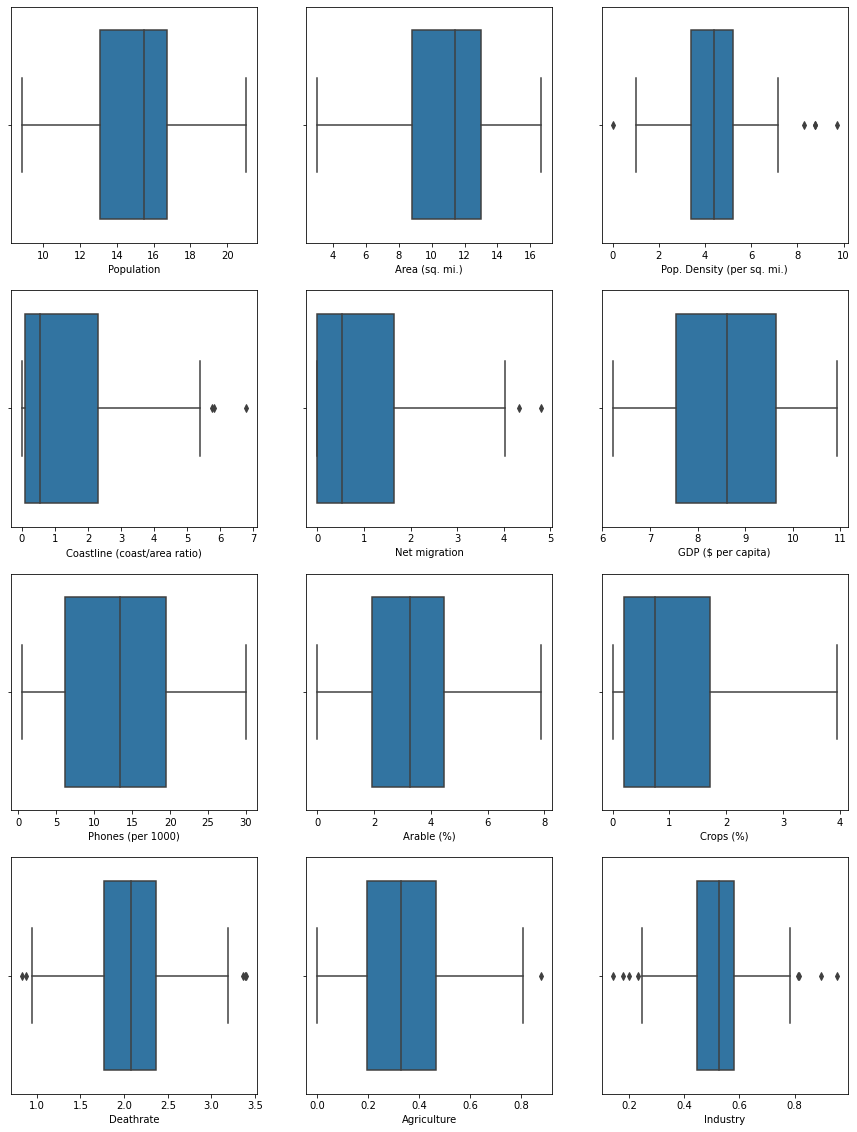

In [284]:
plt.figure(figsize=(15,20))

plt.subplot(4,3,1)

sns.boxplot (np.log(df['Population'])) 
plt.subplot(4,3,2)

sns.boxplot (np.log(df['Area (sq. mi.)'])) 
plt.subplot(4,3,3)

sns.boxplot (np.log1p (df['Pop. Density (per sq. mi.)'])) 
plt.subplot(4,3,4)

sns.boxplot(np.log1p(df['Coastline (coast/area ratio)'])) 
plt.subplot(4,3,5) 

sns.boxplot(np.sqrt(df['Net migration']))

plt.subplot(4,3,6)

sns.boxplot (np.log(df['GDP ($ per capita)'])) 
plt.subplot(4,3,7)

sns.boxplot (np.sqrt(df['Phones (per 1000)'])) 
plt.subplot(4,3,8)

sns.boxplot(np.sqrt(df['Arable (%)']))

plt.subplot(4,3,9)

sns.boxplot (np.log1p (df['Crops (%)']))

plt.subplot(4,3,10) 
sns.boxplot(np.log(df[ 'Deathrate']))

plt.subplot(4,3,11) 
sns.boxplot (np.sqrt(df['Agriculture']))

plt.subplot(4,3,12)

sns.boxplot (np.sqrt(df['Industry']))

plt.show()

In [285]:

df['Population'] = np.log(df['Population']) 
df['Area (sq. mi.)'] = np.log(df['Area (sq. mi.)'])
df['Pop. Density (per sq. mi.)'] = np.log1p(df['Pop. Density (per sq. mi.)'])
df['Coastline (coast/area ratio)'] = np.log1p(df['Coastline (coast/area ratio)'])
df['Net migration'] = np.sqrt(df[ 'Net migration']) 
df['GDP ($ per capita)'] = np.log(df['GDP ($ per capita)']) 
df['Phones (per 1000)'] = np.sqrt(df['Phones (per 1000)']) 
df['Arable (%)'] = np.sqrt(df['Arable (%)'])
df['Crops (%)']=np.log1p(df['Crops (%)']) 
df['Deathrate'] = np.log(df['Deathrate'])
df['Agriculture'] = np.sqrt(df['Agriculture'])
df['Industry'] = np.sqrt(df[ 'Industry'])

#Literacy (%) feature contains outliers even after transformation. So, removing this

df.drop(['Literacy (%)', 'Net migration'], axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [286]:
LE = LabelEncoder()
df['Region'] = LE.fit_transform(df['Region'])


In [287]:

x=df.drop(['GDP ($ per capita)'],axis=1)
y=df['GDP ($ per capita)']

In [288]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3, random_state=10)

In [289]:
st=StandardScaler()
xtrain_scaled=st.fit_transform(xtrain)
xtest_scaled=st.fit_transform(xtest)

**Model Building**

In [301]:
def linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest): 
  lr=LinearRegression() 
  lr.fit(xtrain_scaled,ytrain) 
  ypred=(lr.predict(xtest_scaled)) 
  score=r2_score(ytest,ypred)
  rmse=np.sqrt(mean_squared_error(ytest,ypred))
  print('**Linear Regression Model***') 
  print('Score for Linear Regression Model is {}'.format(score)) 
  print('RMSE for Linear Regression Modell is {}'.format(rmse))

In [302]:
def random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest): 
  rf=RandomForestRegressor() 
  rf.fit(xtrain_scaled,ytrain) 
  ypred=(rf.predict(xtest_scaled)) 
  score=r2_score(ytest,ypred)
  rmse=np.sqrt(mean_squared_error(ytest,ypred))
  print('**Random Forest Regressor Model***') 
  print('Score for Random Forest Regressor Model is {}'.format(score)) 
  print('RMSE for Random Forest Regressor Model is {}'.format(rmse))

In [303]:
def svr(xtrain_scaled,xtest_scaled,ytrain,ytest): 
  svr=SVR() 
  svr.fit(xtrain_scaled,ytrain) 
  ypred=(svr.predict(xtest_scaled)) 
  score=r2_score(ytest,ypred)
  rmse=np.sqrt(mean_squared_error(ytest,ypred))
  print('**SVR Model***') 
  print('Score for SVR Model is {}'.format(score)) 
  print('RMSE for SVR Model is {}'.format(rmse))

In [305]:
def model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest): 
  linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest)
  print('-'*100)
  random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
  print('-'*100)
  svr(xtrain_scaled,xtest_scaled,ytrain,ytest)


**Linear Regression Model***
Score for Linear Regression Model is 0.8340663823997965
RMSE for Linear Regression Modell is 0.47545244882244014
----------------------------------------------------------------------------------------------------
**Random Forest Regressor Model***
Score for Random Forest Regressor Model is 0.8307178634691876
RMSE for Random Forest Regressor Model is 0.48022577228438046
----------------------------------------------------------------------------------------------------
**SVR Model***
Score for SVR Model is 0.79877268052897
RMSE for SVR Model is 0.5235803858426329


In [307]:
model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest)

**Linear Regression Model***
Score for Linear Regression Model is 0.8340663823997965
RMSE for Linear Regression Modell is 0.47545244882244014
----------------------------------------------------------------------------------------------------
**Random Forest Regressor Model***
Score for Random Forest Regressor Model is 0.8190191456683955
RMSE for Random Forest Regressor Model is 0.4965422579552151
----------------------------------------------------------------------------------------------------
**SVR Model***
Score for SVR Model is 0.79877268052897
RMSE for SVR Model is 0.5235803858426329


In [293]:
from joblib import Parallel, delayed
import joblib
  
  
# Save the model as a pickle in a file

joblib.dump(svr, 'Svr.pkl')
joblib.dump(lr, 'Linear.pkl')
joblib.dump(rf, 'Random.pkl')

['Random.pkl']

In [297]:
rf=RandomForestRegressor() 
rf.fit(xtrain_scaled, ytrain) 
ypred=(rf.predict(xtest_scaled))

x_sc=st.transform(x)

CV = cross_val_score (rf,x_sc,y,cv=5)

np.mean(CV)



0.8067724125742833

In [299]:
pickle.dump(rf, open('Random.pkl','wb'))